# Beam Bending Analysis Code :D

## Geometry dimensions, Two setups

#### 3-point beam bending

In [2]:
L3 = 0.7 #3-point length
b3 = 0.03835 #3-point width
h3 = 0.02574 #3-point height

#### 4-point beam bending

In [3]:
L4 = 0.7
b4 = 0.03835
h4 = 0.02574
a = 0.2
b = 0.5
c = 0.15

#### Material Properties

In [4]:
E = 69000e6  # Elastic Modulus
v = 0.33     # Poisson's Ratio
Y = 275e6    # Yield Strength

## Calculate the second moment of inertia I

In [5]:
#This is a function
def areaMomentOfInertia(b,h):
    I = b*h**3/12
    return I

### Max Deflection 

In [6]:
# 3-point max deflection
def threePointDeflection(P,E,I,L):
    w = P*L**3 /(48*E*I)
    return w

# 4-point max deflection
def fourPointDeflection(P,E,I,L,a):
    w = P*a*(3*L**2-4*a**2)/(48*E*I)
    return w

#Calculate deflection for 3-point beam
load = [400 , 800, 1200, 1600] # input a list of the loads in Newtons i.e. [L0, L1, L2,...],
#Notice that the values in excel file is the reaction force, make sure the load is 2 times of the reaction force
I3 = areaMomentOfInertia(b3,h3) #calculate the 2nd moment of area for 3-point beam
deflection3 = [threePointDeflection(P,E,I3,L3)*1000 for P in load]   
print(deflection3)

#Calculate deflection for 4-point beam
I4 = areaMomentOfInertia(b4,h4)
deflection4 = [fourPointDeflection(P,E,I4,L4,a)*1000 for P in load]  
print(deflection4)

[0.7600707736769643, 1.5201415473539286, 2.280212321030893, 3.040283094707857]
[0.5805788417007716, 1.1611576834015431, 1.7417365251023147, 2.3223153668030863]


Text(0.5, 1.0, '4-Point beam bending')

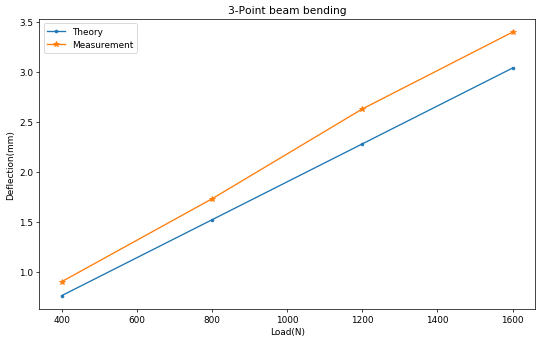

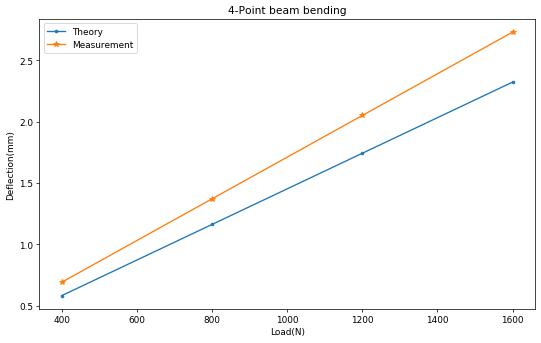

In [7]:
import matplotlib.pyplot as plt

# Deflection data from measurement
D3 = [0.90,1.73,2.63,3.4] #input a list of deflection measurements Data from excel file
D4 = [0.69,1.37,2.05,2.73]

#Plot all the things
fig = plt.figure(1,figsize=(10,6),dpi = 64) #initiate the figure
ax = fig.gca() #get the axes
ax.plot(load,deflection3,'.-',label = 'Theory') #plot the theoretical deflection
ax.plot(load,D3,'*-',label = 'Measurement') #plot the experimental deflection
#note: if you want to use error bars then run the following
#ax.errorbar(load,deflection3,yerr=[listOfYErrors],label = 'Theory')
ax.legend()
ax.set_xlabel('Load(N)')
ax.set_ylabel('Deflection(mm)')
plt.title('3-Point beam bending')

fig = plt.figure(2,figsize=(10,6),dpi = 64)
ax = fig.gca()
ax.plot(load,deflection4,'.-', label = 'Theory')
ax.plot(load,D4,'*-', label = 'Measurement')
ax.legend()
ax.set_xlabel('Load(N)')
ax.set_ylabel('Deflection(mm)')
plt.title('4-Point beam bending')

### Here are the Functions Shear and Moment in Bending

#### For each strain gauge rosette, we have two dimension values x and z

In [8]:
#Shear force for 3-point bending
def shearForce3(P,L,x):
    if x<= L/2:
        Q = P/2
    else:
        Q = -P/2
    return Q

# Moment M for 3-points
def bendingMoment3(P,L,x):
    if x<= L/2:
        M = P*x/2
    else:
        M = P*(L-x)/2
    return M

##### Write your own function for 4-point bending shear force and moment here #####

# Axial stress by moment
def axialStress(M,I,z):
    sigma = M*z/I
    return sigma
# Shear stress by Shear force, since we only care about the top and bottom surface and neutral axix of the beam
def shearStress(Q,b,h,z):
    if z == 0:
        tau = 3*Q/(2*b*h)
    else:
        tau = 0
    return tau

### Rotation Function for Strain

In [9]:
import numpy as np
def strain1Rotate(epsilon,th):
    '''Rotate a strain epsilon =[e_x,e_y,gamma_xy] by an angle th given in radians.'''
    T = [cos(th)**2, sin(th)**2, sin(th)*cos(th)]
    return np.dot(T,epsilon)

## Calculate stresses at each strain gauge rosette

### Take the first strain rosette as example

In [10]:
rosettePosition = [0.35,-h3/2] #[x_coordinate, z_coordinate] this is rosette 1, note that z value equals to zero at neutral axis
P = 400 #load in newtons # First trail of loading
Q = shearForce3(P,L3,rosettePosition[0])
M = bendingMoment3(P,L3,rosettePosition[0])
sig = axialStress(M,I3,rosettePosition[1])
tau = shearStress(Q,b3,h3,rosettePosition[1])

In [11]:
from numpy import sin,cos,pi

# Already have stresses values at each strain rosette, now we can compute the strains using Hooke's law
C = np.array([[1/E, -v/E,0],[-v/E,1/E,0],[0,0,2*(1+v)/E]]) #stiffness tensor
                
# Let's take strain rosette 1 as example. We need both axial strains and the shear strain
epsilon = np.dot(C,np.array([sig,0,tau])) # No stress on y direction

# Now transform from coordinate strains to the direction of strain gauge
ros1 = [0,45,90] #all three gauge directions
e1a = strain1Rotate(epsilon,ros1[0]*pi/180)
e1b = strain1Rotate(epsilon,ros1[1]*pi/180)
e1c = strain1Rotate(epsilon,ros1[2]*pi/180)
epsilon_rosette1 = np.array([e1a,e1b,e1c])

#This can also be done using list comprehensions as
epsilon_rosette1Alt = np.array([strain1Rotate(epsilon,th*pi/180) for th in ros1])

# Since the unit of measurement is micron strain, the results here need to be multiplied by 1e6
epsilon_rosette1 *= 1e6 #this multiplies the original value by 1e6
epsilon_rosette1Alt *= 1e6
print(epsilon_rosette1)
print(epsilon_rosette1Alt)

[-239.56189854  -80.25323601   79.05542652]
[-239.56189854  -80.25323601   79.05542652]
